In [143]:
import pandas as pd
import numpy as np
import seaborn as sns 
import missingno as msno
import matplotlib as mpl
import matplotlib
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

In [283]:
df = pd.read_excel('D:/programming/쌀_품1.xlsx')
df.head()

,품종명,품종,제현율,도정율,백미 완전립 비율,완전미도정수율,싸라기,분상질립,장폭비,심복백(0~9),...,단백질 함량(%),아밀로스함량(%),밥맛관능검정(-3∼+3),투명도1~9,경도,수분,피해립,열손립,기타이물,용도 및 특이점
0,수원619호,미소찬,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,밥쌀용
1,제이제이621엠알,JJ621MR,82.9,74.4,NaN,72.3,NaN,NaN,NaN,NaN,...,6.5,19.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,밥쌀용
2,수원636호,월하미,83.6,74.1,67.8,50.2,17.2,12.5,3.2,0/2,...,6.8,23.3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,밥쌀용:수출용(동남아시아 종자수출용)
3,전주623호,참동진,NaN,75.1,NaN,NaN,NaN,NaN,NaN,NaN,...,5.7,18.7,0.11,NaN,NaN,NaN,NaN,NaN,NaN,"밥쌀용(신동진 대체품종, 브랜드 바로적용 가능)"
4,진부63호,진평,NaN,NaN,NaN,74.3,NaN,NaN,NaN,NaN,...,5.6,18.8,0.42,NaN,NaN,NaN,NaN,NaN,NaN,밥쌀용


In [284]:
print(platform.system()) # 플랫폼 확인
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')
# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False
df.index = df

Windows


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281 entries, ('수원619호', '미소찬', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, '밥쌀용') to (nan, '참드림', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 5.4, 19.5, nan, nan, nan, nan, nan, nan, nan, nan)
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   품종명            273 non-null    object 
 1   품종             281 non-null    object 
 2   제현율            166 non-null    float64
 3   도정율            218 non-null    float64
 4   백미 완전립 비율      188 non-null    float64
 5   완전미도정수율        73 non-null     float64
 6   싸라기            22 non-null     object 
 7   분상질립           32 non-null     float64
 8   장폭비            194 non-null    float64
 9   심복백(0~9)       241 non-null    object 
 10  알카리붕괴도(1~7)    148 non-null    float64
 11  윤기치            14 non-null     float64
 12  단백질 함량(%)      167 non-null    float64
 13  아밀로스함량(

In [286]:
dfnull= df.isnull().sum()
dfnull

품종명                8
품종                 0
제현율              115
도정율               63
백미 완전립 비율         93
완전미도정수율          208
싸라기              259
분상질립             249
장폭비               87
심복백(0~9)          40
알카리붕괴도(1~7)      133
윤기치              267
단백질 함량(%)        114
아밀로스함량(%)         24
밥맛관능검정(-3∼+3)    186
투명도1~9           105
경도               276
수분               281
피해립              277
열손립              281
기타이물             281
용도 및 특이점         161
dtype: int64

In [287]:
df.dtypes

품종명               object
품종                object
제현율              float64
도정율              float64
백미 완전립 비율        float64
완전미도정수율          float64
싸라기               object
분상질립             float64
장폭비              float64
심복백(0~9)          object
알카리붕괴도(1~7)      float64
윤기치              float64
단백질 함량(%)        float64
아밀로스함량(%)        float64
밥맛관능검정(-3∼+3)    float64
투명도1~9           float64
경도               float64
수분               float64
피해립              float64
열손립              float64
기타이물             float64
용도 및 특이점          object
dtype: object

In [288]:
pd.to_numeric(df['완전미도정수율'])

(수원619호, 미소찬, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 밥쌀용)                               NaN
(제이제이621엠알, JJ621MR, 82.9, 74.4, nan, 72.3, nan, nan, nan, nan, nan, nan, 6.5, 19.7, nan, nan, nan, nan, nan, nan, nan, 밥쌀용)                   72.3
(수원636호, 월하미, 83.6, 74.1, 67.8, 50.2, 17.2, 12.5, 3.2, 0/2, 7.0, 62.7, 6.8, 23.3, nan, 1.0, nan, nan, nan, nan, nan, 밥쌀용:수출용(동남아시아 종자수출용))     50.2
(전주623호, 참동진, nan, 75.1, nan, nan, nan, nan, nan, nan, nan, nan, 5.7, 18.7, 0.11, nan, nan, nan, nan, nan, nan, 밥쌀용(신동진 대체품종, 브랜드 바로적용 가능))     NaN
(진부63호, 진평, nan, nan, nan, 74.3, nan, nan, nan, nan, nan, 79.4, 5.6, 18.8, 0.42, nan, nan, nan, nan, nan, nan, 밥쌀용)                            74.3
                                                                                                                                               ... 
(nan, 백진주, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 5.6, 9.1, nan, nan, nan, nan, nan, nan, nan, nan)  

In [289]:
pd.to_numeric(df['알카리붕괴도(1~7)'])

(수원619호, 미소찬, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 밥쌀용)                              NaN
(제이제이621엠알, JJ621MR, 82.9, 74.4, nan, 72.3, nan, nan, nan, nan, nan, nan, 6.5, 19.7, nan, nan, nan, nan, nan, nan, nan, 밥쌀용)                   NaN
(수원636호, 월하미, 83.6, 74.1, 67.8, 50.2, 17.2, 12.5, 3.2, 0/2, 7.0, 62.7, 6.8, 23.3, nan, 1.0, nan, nan, nan, nan, nan, 밥쌀용:수출용(동남아시아 종자수출용))     7.0
(전주623호, 참동진, nan, 75.1, nan, nan, nan, nan, nan, nan, nan, nan, 5.7, 18.7, 0.11, nan, nan, nan, nan, nan, nan, 밥쌀용(신동진 대체품종, 브랜드 바로적용 가능))    NaN
(진부63호, 진평, nan, nan, nan, 74.3, nan, nan, nan, nan, nan, 79.4, 5.6, 18.8, 0.42, nan, nan, nan, nan, nan, nan, 밥쌀용)                            NaN
                                                                                                                                              ... 
(nan, 백진주, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 5.6, 9.1, nan, nan, nan, nan, nan, nan, nan, nan)        

In [290]:
pd.to_numeric(df['밥맛관능검정(-3∼+3)'])

(수원619호, 미소찬, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 밥쌀용)                               NaN
(제이제이621엠알, JJ621MR, 82.9, 74.4, nan, 72.3, nan, nan, nan, nan, nan, nan, 6.5, 19.7, nan, nan, nan, nan, nan, nan, nan, 밥쌀용)                    NaN
(수원636호, 월하미, 83.6, 74.1, 67.8, 50.2, 17.2, 12.5, 3.2, 0/2, 7.0, 62.7, 6.8, 23.3, nan, 1.0, nan, nan, nan, nan, nan, 밥쌀용:수출용(동남아시아 종자수출용))      NaN
(전주623호, 참동진, nan, 75.1, nan, nan, nan, nan, nan, nan, nan, nan, 5.7, 18.7, 0.11, nan, nan, nan, nan, nan, nan, 밥쌀용(신동진 대체품종, 브랜드 바로적용 가능))    0.11
(진부63호, 진평, nan, nan, nan, 74.3, nan, nan, nan, nan, nan, 79.4, 5.6, 18.8, 0.42, nan, nan, nan, nan, nan, nan, 밥쌀용)                            0.42
                                                                                                                                               ... 
(nan, 백진주, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 5.6, 9.1, nan, nan, nan, nan, nan, nan, nan, nan)  

<AxesSubplot:ylabel='투명도1~9'>

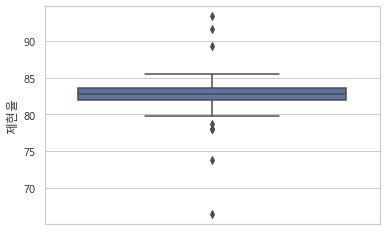

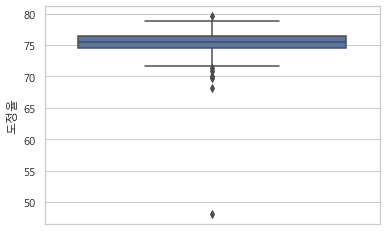

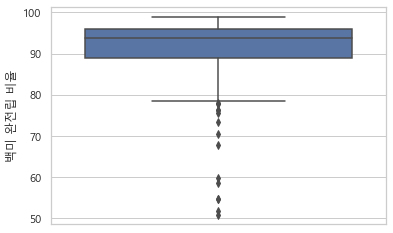

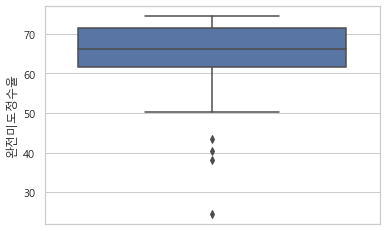

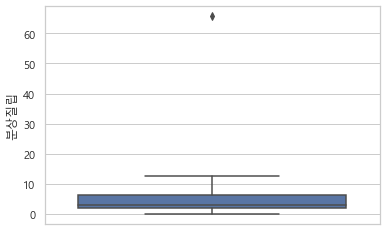

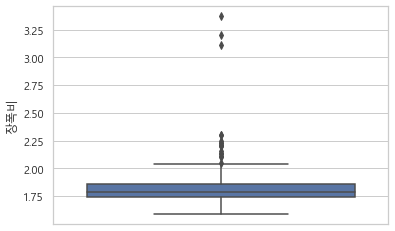

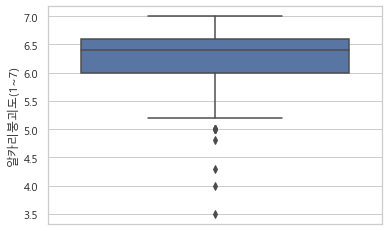

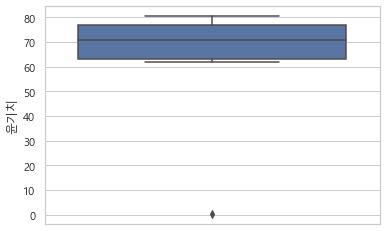

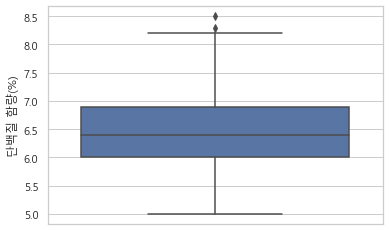

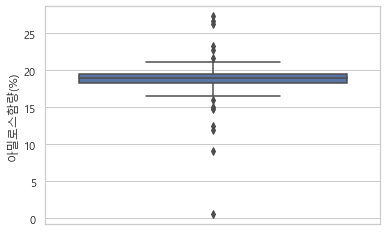

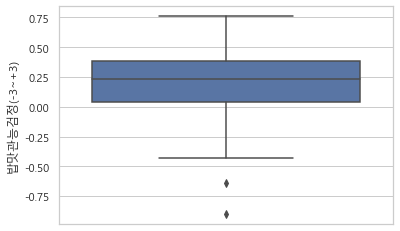

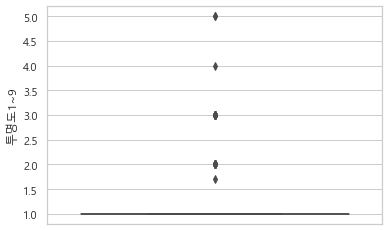

In [305]:
plt.figure(1)
sns.boxplot(y=df["제현율"])

plt.figure(2)
sns.boxplot(y=df["도정율"])

plt.figure(3)
sns.boxplot(y=df["백미 완전립 비율"])

plt.figure(4)
sns.boxplot(y=df["완전미도정수율"])

plt.figure(5)
sns.boxplot(y=df["분상질립"])

plt.figure(6)
sns.boxplot(y=df["장폭비"])

plt.figure(7)
sns.boxplot(y=df["알카리붕괴도(1~7)"])

plt.figure(8)
sns.boxplot(y=df["윤기치"])

plt.figure(9)
sns.boxplot(y=df["단백질 함량(%)"])

plt.figure(10)
sns.boxplot(y=df["아밀로스함량(%)"])

plt.figure(11)
sns.boxplot(y=df["밥맛관능검정(-3∼+3)"])

plt.figure(12)
sns.boxplot(y=df["투명도1~9"])


Text(0.5, 1.0, '투명도1~9')

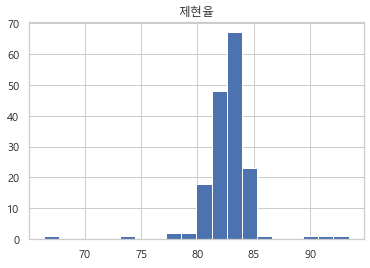

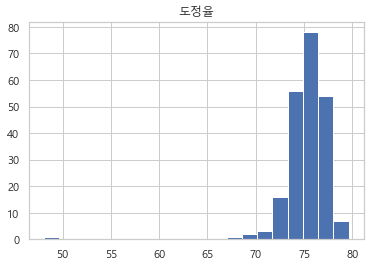

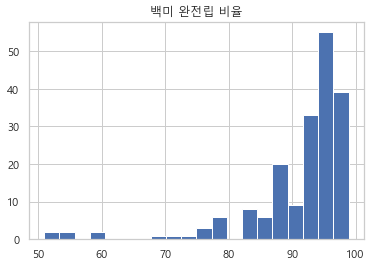

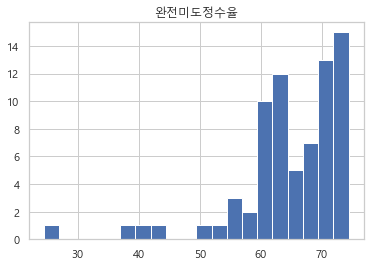

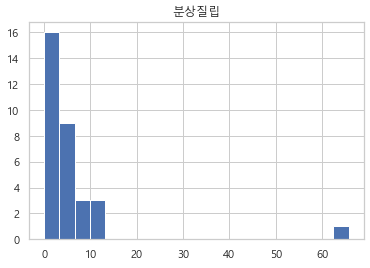

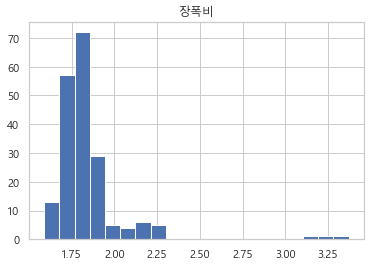

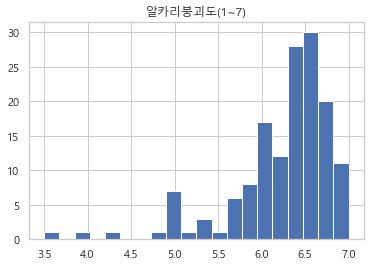

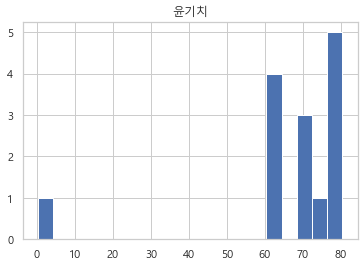

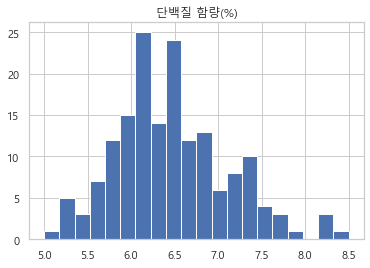

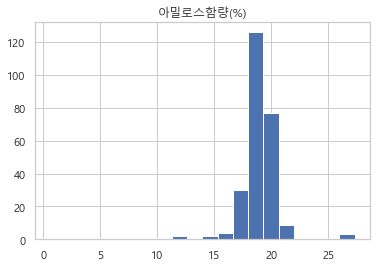

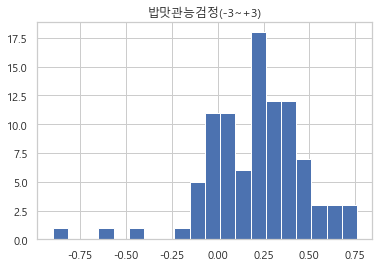

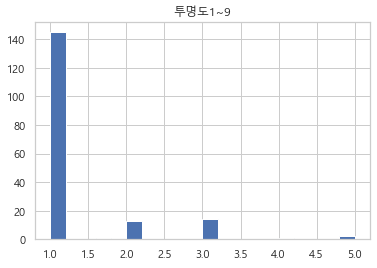

In [315]:
plt.figure(1)
plt.hist(df['제현율'], bins=20)
plt.title('제현율')

plt.figure(2)
plt.hist(df['도정율'], bins=20)
plt.title('도정율')

plt.figure(3)
plt.hist(df['백미 완전립 비율'], bins=20)
plt.title('백미 완전립 비율')

plt.figure(4)
plt.hist(df['완전미도정수율'], bins=20)
plt.title('완전미도정수율')

plt.figure(5)
plt.hist(df['분상질립'], bins=20)
plt.title('분상질립')

plt.figure(6)
plt.hist(df['장폭비'], bins=20)
plt.title('장폭비')

plt.figure(7)
plt.hist(df['알카리붕괴도(1~7)'], bins=20)
plt.title('알카리붕괴도(1~7)')

plt.figure(8)
plt.hist(df['윤기치'], bins=20)
plt.title('윤기치')

plt.figure(9)
plt.hist(df['단백질 함량(%)'], bins=20)
plt.title('단백질 함량(%)')

plt.figure(10)
plt.hist(df['아밀로스함량(%)'], bins=20)
plt.title('아밀로스함량(%)')

plt.figure(11)
plt.hist(df['밥맛관능검정(-3∼+3)'], bins=20)
plt.title('밥맛관능검정(-3∼+3)')

plt.figure(12)
plt.hist(df['투명도1~9'], bins=20)
plt.title('투명도1~9')